In [1]:
from __future__ import division

In [2]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
from scipy import signal
from scipy.signal import butter, ellip, lfilter, freqz, filtfilt
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import IPython.display as ipd
import librosa
import librosa.display
%matplotlib notebook
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import HTML

# ΨΗΦΙΑΚΗ ΕΠΕΞΕΡΓΑΣΙΑ ΗΧΟΥ 
## ΑΣΚΗΣΗ 5 - 2019- 2020
**ΑΝΔΡΕΑΣ ΜΠΑΡΔΟΥΤΣΟΣ  
ΔΠΜΣ ΣΜΗΝ  
ΑΜ: 1041125**

Δημιουργία παλμικού σήματος διακριτού χρόνου με περίοδο 9 δείγματα, του οποίου τα πρώτα 4 δείγματα θα είναι ίσα προς ένα και τα υπόλοιπα μηδενικά.

In [3]:
xx = np.zeros(9)
xx[:4] = 1

Δημιουργία δέκα επαναλήψεων του σήματος:

Length of vector x : (90,)


<IPython.core.display.Javascript object>


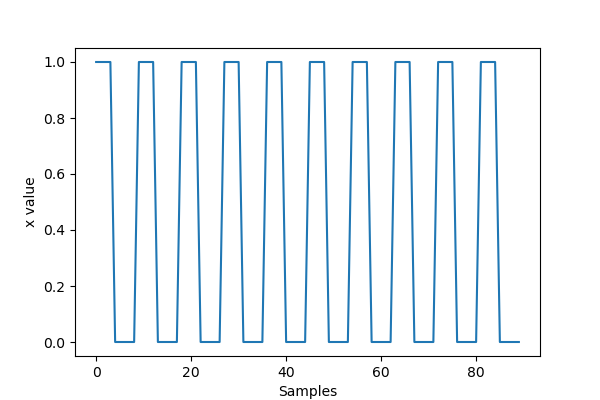

Text(0.5, 0, 'Samples')

In [4]:
x = np.empty(0)
for i in range(0,10):
    x = np.append(x,xx)
print("Length of vector x :", x.shape)
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(x)
ax.set_ylabel("x value")
ax.set_xlabel("Samples")

# 1. Δημιουργία FIR φίλτρου

Για την δημιουργία του φίλτρου γίνεται χρήση της συνάρτησης [`scipy.signal.firwin`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html). Σχετικά με την υλοποίηση FIR φίλτρων στην python χρήσιμοι είναι οι οδηγοί [εδώ](http://mpastell.com/2010/01/18/fir-with-scipy/) και [εδώ](https://scipy-cookbook.readthedocs.io/items/ApplyFIRFilter.html). Η συνάρτηση έχει παρόμοια χρήση με τη συνάρτηση fir1 της matlab καθώς επίσης χρησιμοποιεί παράθυρο Hamming κατά τον υπολογισμό του φίλτρου.

<IPython.core.display.Javascript object>


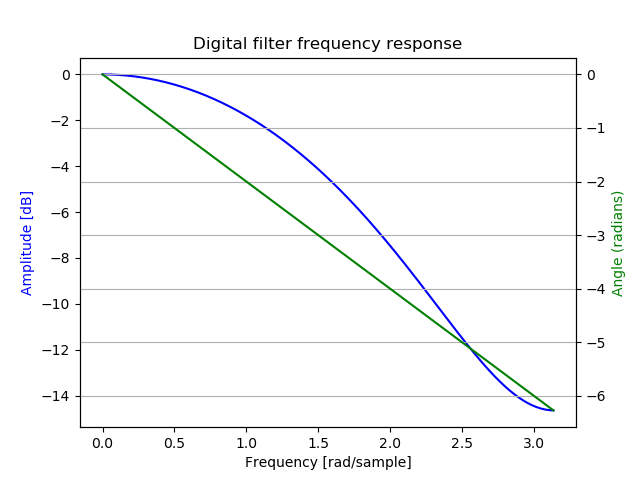

In [5]:
# define the filter
b = signal.firwin(5, cutoff = 0.5, window = "hamming")
w, h = signal.freqz(b)
fig_fir, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

Για την εφαρμογή του φίλτρου στο σήμα εισόδου χρησιμοποιείται η συνάρτηση [`signal.filtfilt`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html). Περισσότερα για την χρήση της συνάρτησης  `filtfilt` έναντι της συνάρτησης `signal.lfilter` περιγράφονται [εδώ](https://dsp.stackexchange.com/questions/19084/applying-filter-in-scipy-signal-use-lfilter-or-filtfilt).

<IPython.core.display.Javascript object>


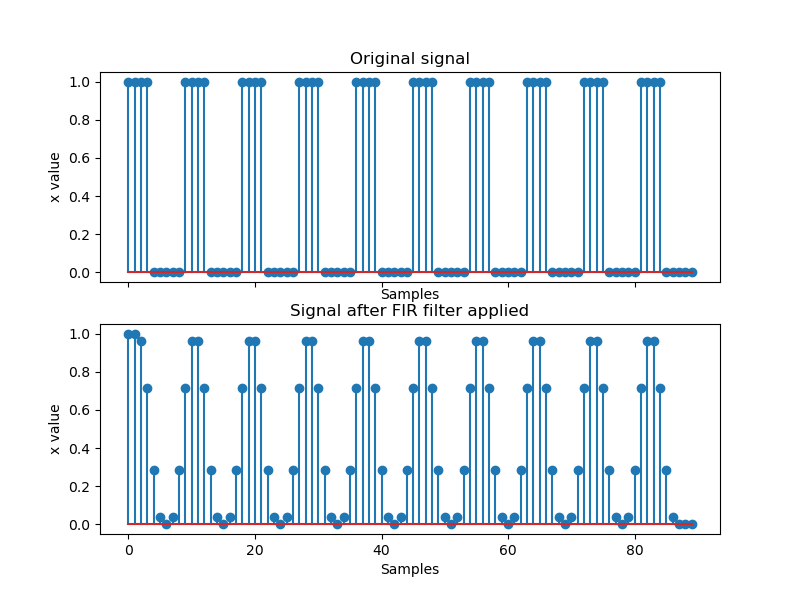

/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 0, 'Samples')

In [6]:
y_fir = signal.filtfilt(b,1,x)
fig_fir2, [ax, ax2] = plt.subplots(2,1, figsize=(8,6), sharex=True)
ax.stem(x)
ax.set_title("Original signal")
ax.set_ylabel("x value")
ax.set_xlabel("Samples")
ax2.stem(y_fir)
ax2.set_title("Signal after FIR filter applied")
ax2.set_ylabel("x value")
ax2.set_xlabel("Samples")

# 2. Δημιουργία IIR φίλτρου

Για τη δημιουργία IIR φίλτρου στην python μπορούν να χρησημοποιηθούν διάφορες συναρτήσεις τύπων IIR φίλτρων όπως η [`scipy.signal.iirfilter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html), [`scipy.signal.butter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter),[`scipy.signal.cheby`](scipy.signal.cheby1), [`scipy.signal.bessel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bessel.html#scipy.signal.bessel), [`scipy.signal.ellip`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html#scipy.signal.ellip). Σύμφωνα με την προτροπή της άσκησης παρακάτω γίνεται χρήση της `scipy.signal.ellip`.

<IPython.core.display.Javascript object>


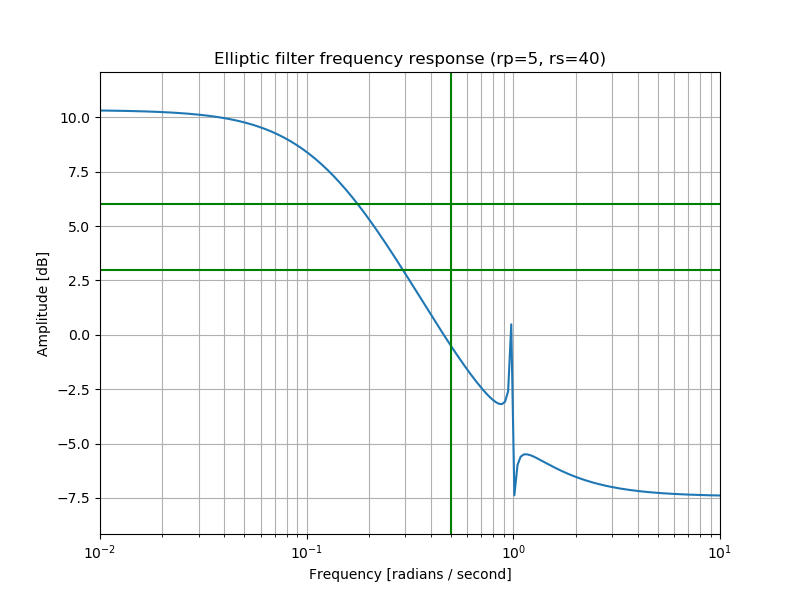

In [7]:
# scipy.signal.ellip(N, rp, rs, Wn)
# N : The order of the filter.
N = 5
# rp:  decibels of peak-to-peak passband ripple
rp = 3
# rs : decibels of stopband attenuation down from the peak passband value
rs = 6
# Wn : A scalar or length-2 sequence giving the edge frequencies. 
Wn = 0.5
b, a = signal.ellip(N,rp,rs,Wn, 'low')
w, h = signal.freqs(b, a)
fig_iir_freq_resp, ax = plt.subplots(1,1, figsize=(8,6))
ax.semilogx(w, 20 * np.log10(abs(h)))
ax.set_title('Elliptic filter frequency response (rp=5, rs=40)')
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.margins(0, 0.1)
ax.grid(which='both', axis='both')
ax.axvline(0.5, color='green') # cutoff frequency
ax.axhline(rs, color='green') # rs
ax.axhline(rp, color='green') # rp
plt.show()

<IPython.core.display.Javascript object>


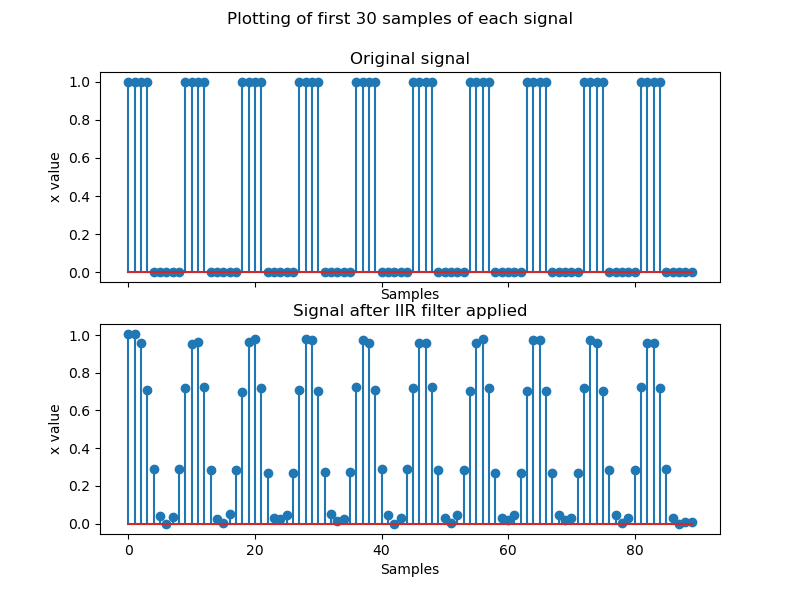

/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 0.98, 'Plotting of first 30 samples of each signal')

In [8]:
y_iir = signal.filtfilt(b,a,x)
fig_iir, [ax, ax3] = plt.subplots(2,1, figsize=(8,6), sharex=True)
ax.stem(x)
ax.set_title("Original signal")
ax.set_ylabel("x value")
ax.set_xlabel("Samples")
ax3.stem(y_iir)
ax3.set_title("Signal after IIR filter applied")
ax3.set_ylabel("x value")
ax3.set_xlabel("Samples")
fig_iir.suptitle("Plotting of first 30 samples of each signal")

Ακολουθεί διάγραμμα στο οποίο φαίνονται τα πρώτα 30 δείγματα για κάθε σήμα, ώστε να διακρίνονται οι διαφορές που έχουν προκύψει κατά την επεξεργασία.

<IPython.core.display.Javascript object>


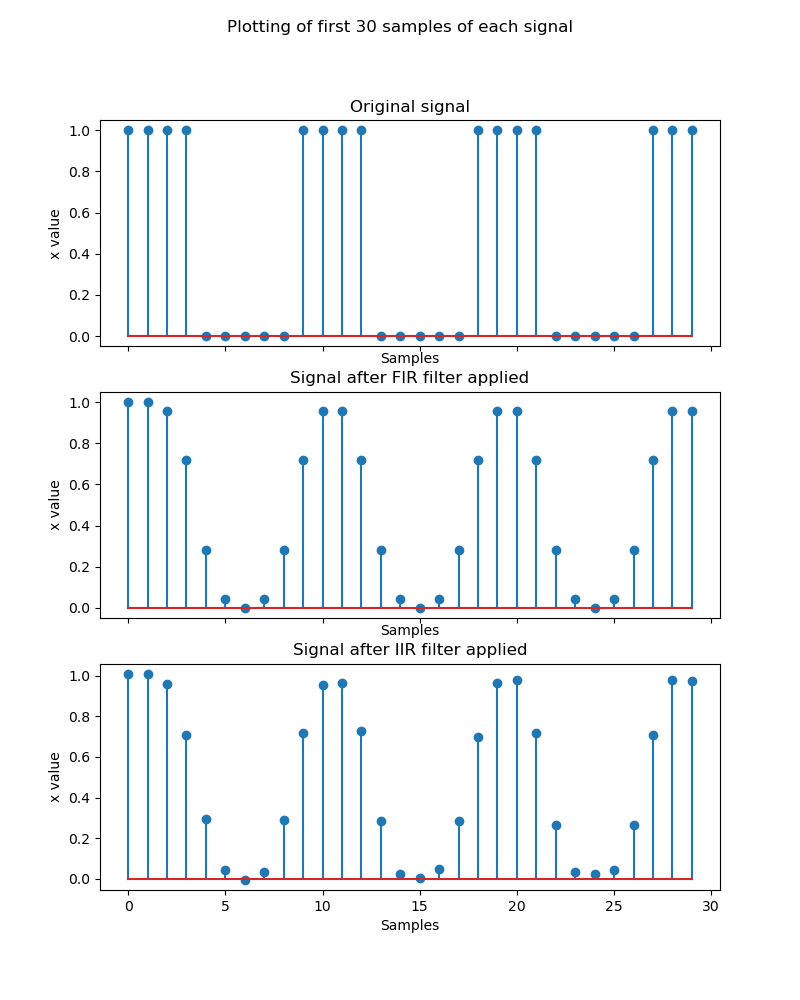

/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot

Text(0.5, 0.98, 'Plotting of first 30 samples of each signal')

In [9]:
fig_iir, [ax, ax2, ax3] = plt.subplots(3,1, figsize=(8,10), sharex=True)
ax.stem(x[:30])
ax.set_title("Original signal")
ax.set_ylabel("x value")
ax.set_xlabel("Samples")
ax2.stem(y_fir[:30])
ax2.set_title("Signal after FIR filter applied")
ax2.set_ylabel("x value")
ax2.set_xlabel("Samples")
ax3.stem(y_iir[:30])
ax3.set_title("Signal after IIR filter applied")
ax3.set_ylabel("x value")
ax3.set_xlabel("Samples")
fig_iir.suptitle("Plotting of first 30 samples of each signal")

# Εφαρμογή των φίλτρων σε ηχητικά δείγματα

In [10]:
sample_wdgt = widgets.Dropdown(
    options=['speech.wav','xylophone.wav', 'bongo.wav'],
    value='speech.wav',
    description='Audio :\n',
    disabled=False,
)

In [11]:
# this is a wrapper that take a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

Επιλογή του αρχείου ήχου που θέλουμε να ακούσουμε:

In [12]:
display(sample_wdgt)

Dropdown(description='Audio :\n', options=('speech.wav', 'xylophone.wav', 'bongo.wav'), value='speech.wav')

Στη συνέχεια εκτελουνται τα ακόλουθα κελιά για να εφαρμοστούν τα φίλτρα στο κομμάτι ήχου που επιλέχθηκε και να εξαχθούν οι κατάλληλες παρατηρήσεις.

In [13]:
f = sample_wdgt.value
print(f)
wavPlayer(f)
y, sr = librosa.load(f)

speech.wav


In [14]:

# apply FIR filter
b = signal.firwin(5, cutoff = 0.5, window = "hamming")
y_fir = signal.filtfilt(b,1,y)
print("Listen to audio after FIR filter applied.")
ipd.Audio(y_fir,rate= sr)

Listen to audio after FIR filter applied.


In [15]:
# Apply IIR
b, a = signal.ellip(N,rp,rs,Wn, 'low')
y_iir = signal.filtfilt(b,a,y)
print("Listen to audio after IIR filter applied.")
ipd.Audio(y_iir, rate= sr)

Listen to audio after IIR filter applied.


Κατά την ακρόαση φαίνεται η επίδραση των φίλτρων να αφορά κυρίως την ένταση του σήματος στην έξοδο. Στη συνέχεια ακολουθούν τα φασματογραφήματα για κάθε ήχο, όπου όπως φαίνεται δεν υπάρχει κάποια ουσιαστική μεταβολή καθώς η συχνότητα αποκοπής που έχει οριστεί είναι αρκετά χαμηλή.

In [16]:
# function which plots the produced spectrograms with the use of librosa library
def plot_specgram_librosa(y, sr, figtitle):
    """
    https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html
    
    y : input signal
    sr : sampling rate
    
    return ax of matplotlib subplot
    """
    n_fft = 2048
    hop_length = 512
    D = np.abs(librosa.stft(y, n_fft=n_fft,  hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.title(figtitle)

<IPython.core.display.Javascript object>


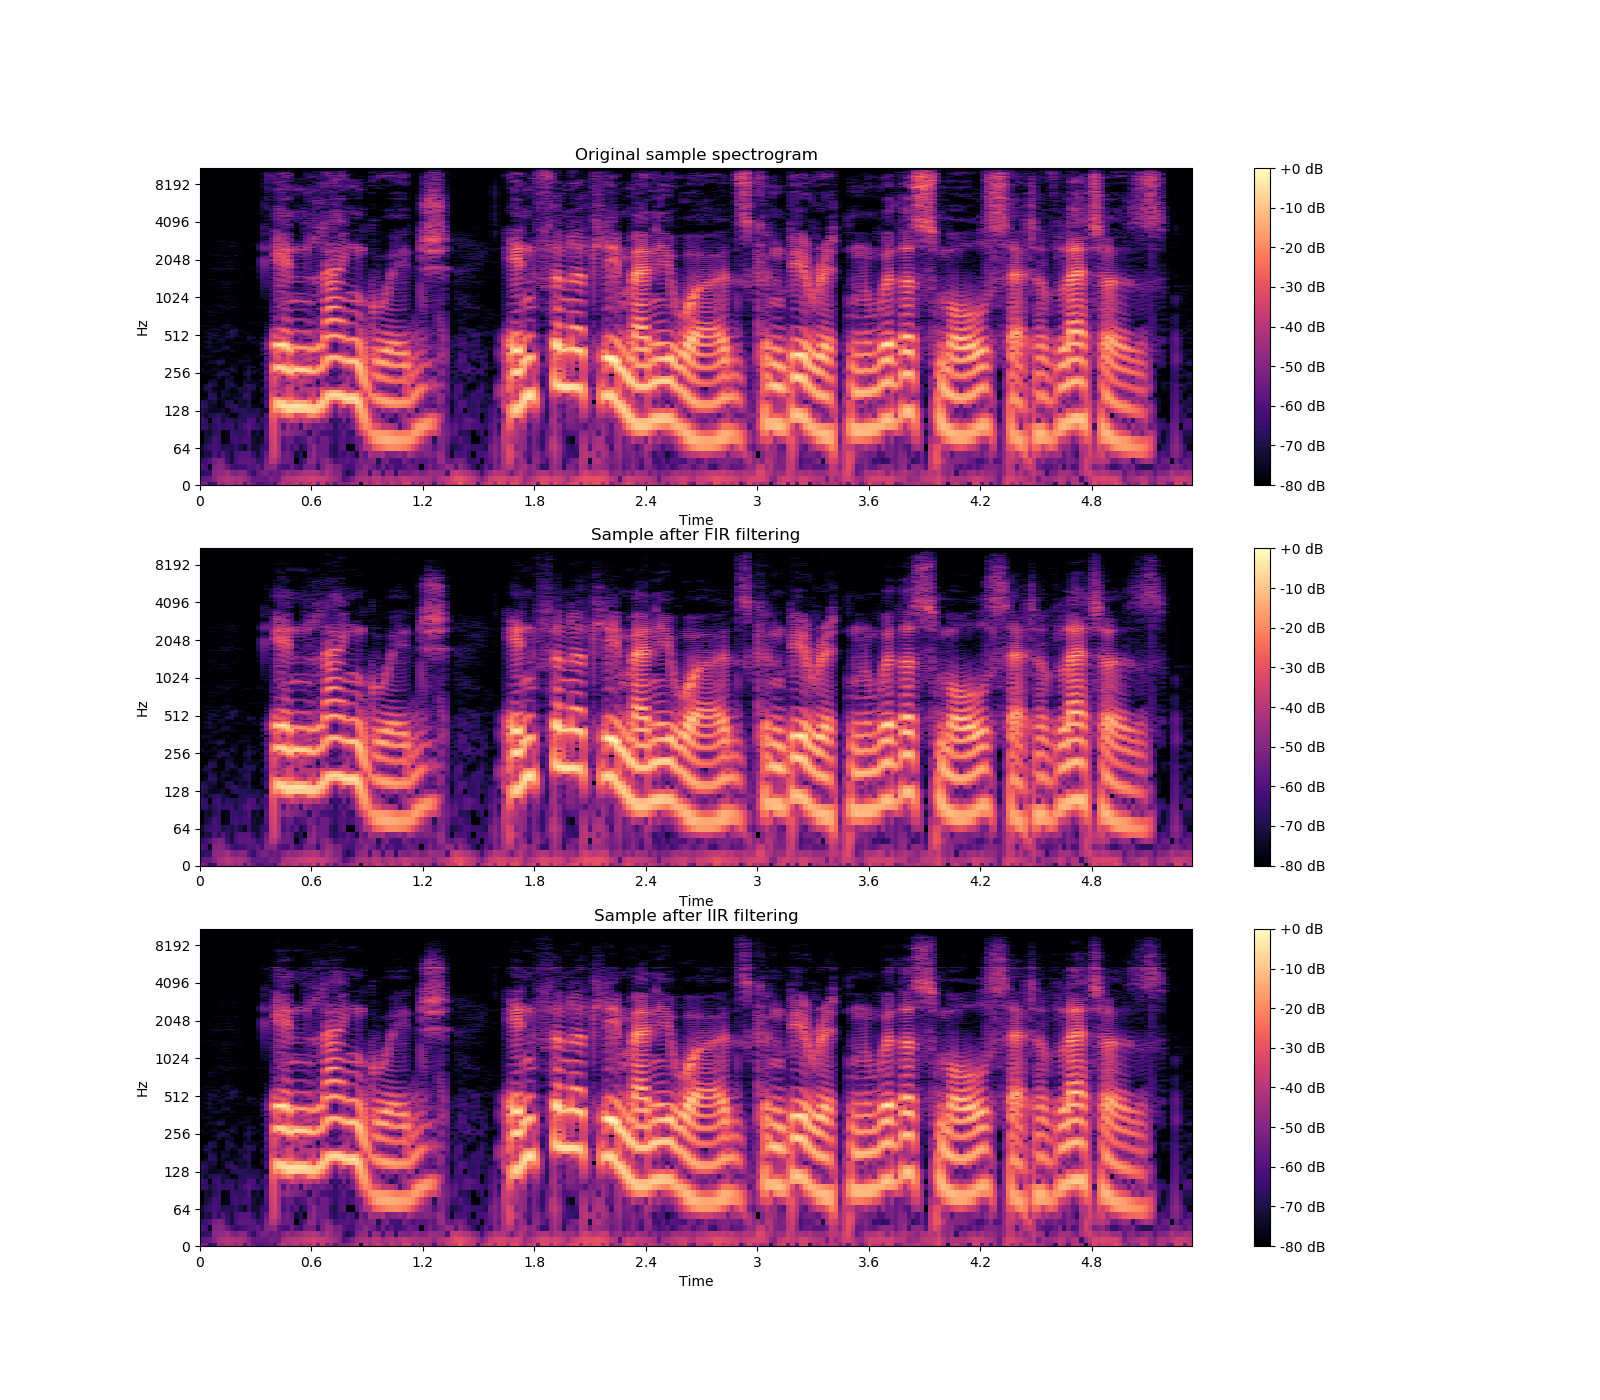

In [17]:
# fig_librosa2, axs = plt.subplots(3,1, figsize=(12,6), sharex=True)
fig_librosa = plt.figure(figsize=(16, 14))
plt.subplot(3, 1, 1)
plot_specgram_librosa(y, sr, "Original sample spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 1, 2)
plot_specgram_librosa(np.asfortranarray(y_fir), sr, "Sample after FIR filtering")
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 1, 3)
plot_specgram_librosa(np.asfortranarray(y_iir), sr, "Sample after IIR filtering")
plt.colorbar(format='%+2.0f dB')